# COVID-19 and Urban Air Pollution

New York Univeristy CS-GY 6513 Spring 2020 Final Project

Tianrun Wang (tw969), Raymond Dee (rmd377), Jonathan Pun (jp5474)

## Abstract

The public health crisis caused by the Novel Coronavirus (COVID-19) prompted governments worldwide to restrict human movement in a bid to limit the spread of the respiratory disease. Since the outbreak in March 2020 in the United States, many states and municipalities have issued stay-at-home orders, and economic activity has been largely reduced to essential services only. The unprecedented restriction on economic activity has led to a significant drop in traffic volume, factory production, and other sources widely attributted to urban air pollution, leading to a substantial improvement in air quality in major U.S. cities.

In this project, we analyze the relationship between the severity of COVID-19 outbreak in a city and the improvement of air quality. We will primarily focus our analysis on the experience of New York City, due to the quality and availability of its high-frequency data on ground traffic, air pollution and COVID-19 case count.

## Notebook Setup

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling and Overview

### 1. EPA Air Quality Data

In [10]:
# EPA daily air quality data in 2019 and 2020
aqi19 = pd.read_csv('data/aqidaily2019.csv')
aqi20 = pd.read_csv('data/aqidaily2020.csv')

# concat rows
aqi = pd.concat([aqi19, aqi20], axis=0)

# parse Date column to datetime and set as index
aqi['Date'] = pd.to_datetime(aqi['Date'], format='%m/%d/%Y')
aqi.set_index('Date', inplace=True)

In [13]:
aqi.head()

,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
Date,,,,,,,,,,,
2019-01-01,45,PM2.5,MASPETH LIBRARY,36-081-0120,AQS,6,30,0,.,45,38
2019-01-02,64,PM2.5,PS 19,36-061-0128,AQS,7,29,6,.,64,32
2019-01-03,54,PM2.5,PS 19,36-061-0128,AQS,6,26,3,11,54,37
2019-01-04,60,PM2.5,Elizabeth Lab,34-039-0004,AQS,9,20,6,.,60,34
2019-01-05,50,PM2.5,DIVISION STREET,36-061-0134,AQS,9,26,33,.,50,31


In [17]:
len(aqi)

480

The dataframe consists of daily observations of air quality index and 6 pollutants in the metropolitan New York area ranging from 2019-01-01 to 2020-04-24. We will use Overall AQI Value as the primary gauge of air quality, quoting EPA, "AQI is a measure that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality".

An interesting observation just by looking at the top 5 rows is that PM2.5 seems to be the main pollutant in New York City, let's examine the dataframe more closely.

In [15]:
# group by Main Pollutant and count
aqi.groupby(['Main Pollutant']).count()

,Overall AQI Value,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
Main Pollutant,,,,,,,,,,
NO2,61,61,61,61,61,61,61,61,61,61
Ozone,190,190,190,190,190,190,190,190,190,190
PM2.5,229,229,229,229,229,229,229,229,229,229


We see that PM2.5 prevails as the major pollutant in NYC area in close to half of the days for the past 16 months. PM2.5 is defined as fine particles with a diameter of 2.5 μm or less, and is often emitted by automobile engines and industrial fuel consumption, according to [Wikipedia](https://en.wikipedia.org/wiki/Particulates#Sources_of_atmospheric_particulate_matter). This is consistent with our hypothesis that the improvement in air quality is due to the reduction of ground traffic caused by COVID-19 shutdowns.

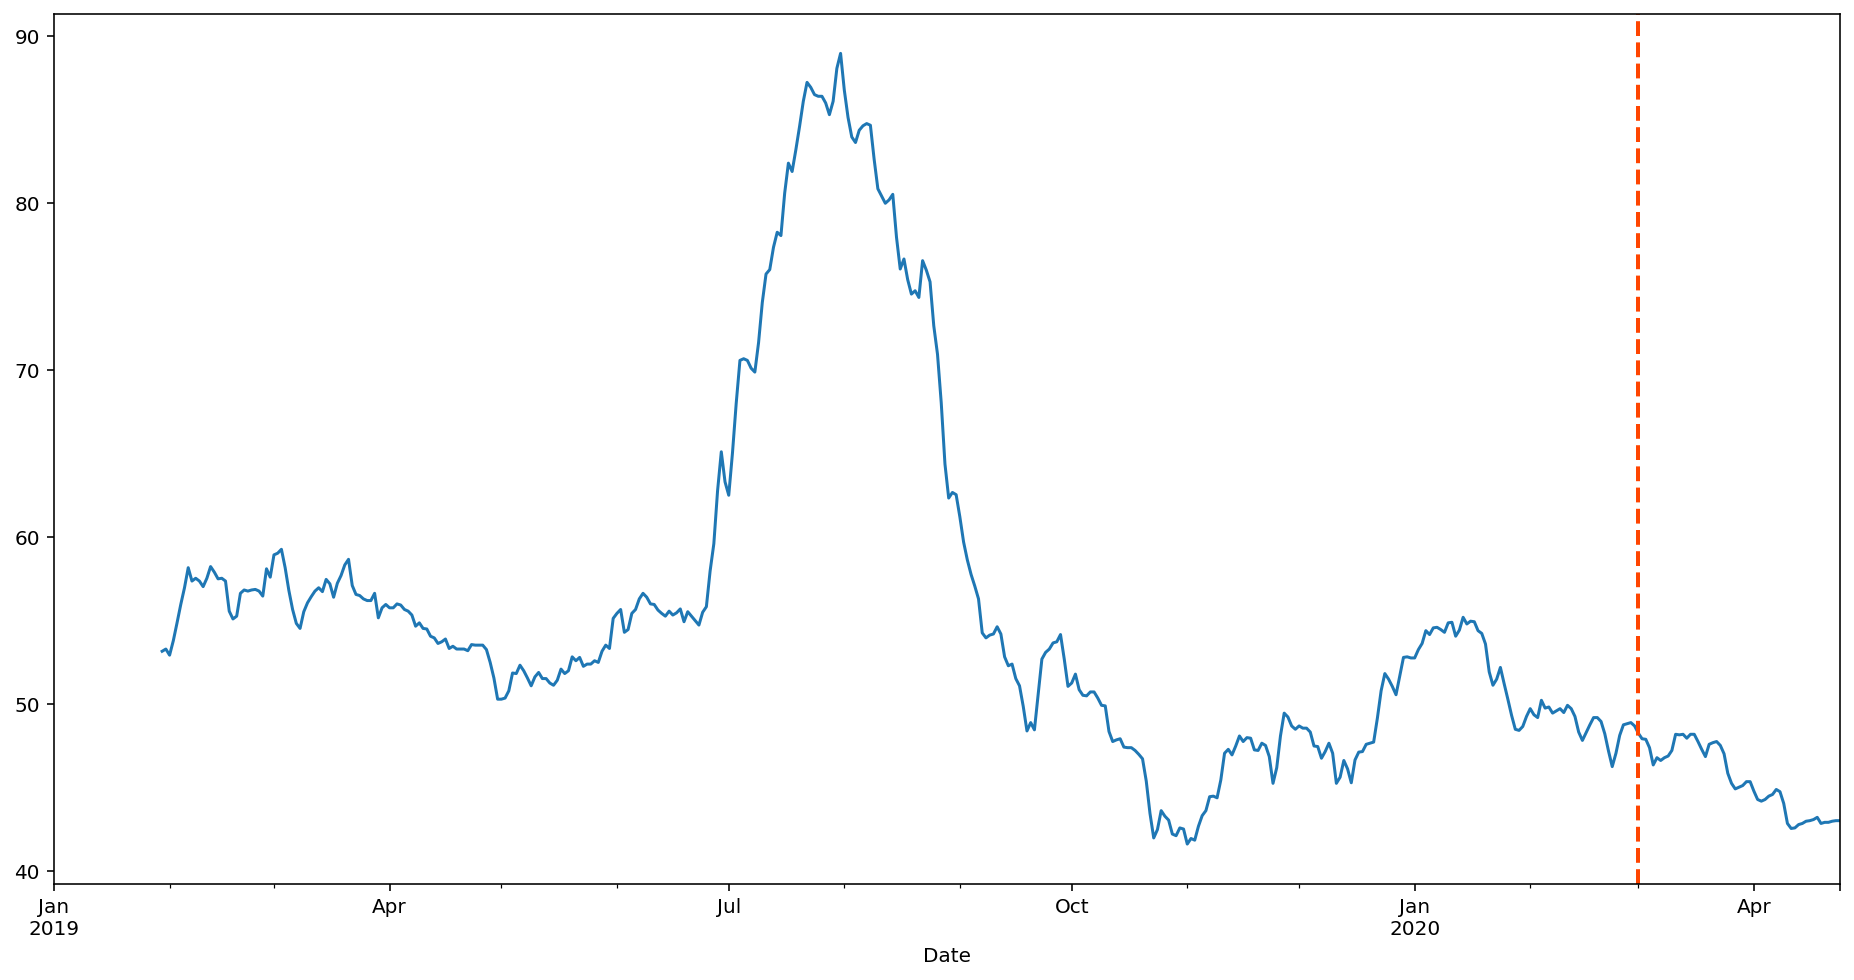

In [33]:
# plot AQI trend from January 2019 to April 2020
aqi_plot = aqi['Overall AQI Value'].rolling(30).mean().plot(figsize=(16, 8))
_ = aqi_plot.axvline('2020-03-01', color='orangered', linestyle='--', lw=2, alpha=1.0)